### Select the Right Threshold values using ROC Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1) #generating data for classification problem

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Random Forests

In [7]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9835388888888889


In [12]:
ytrain_pred

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.02, 0.98],
       ...,
       [0.98, 0.02],
       [0.98, 0.02],
       [0.22, 0.78]])

#### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863589331232614
Logistic test roc-auc: 0.9885777777777777


#### Adaboost Classifier

In [14]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

/home/kaneki003/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


#### KNNClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


#### No we will focus on selecting the best threshold for maximum accuracy

In [20]:
# Calculating predictons from all above algorithms
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9850111111111111


In [21]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.97,0.991873,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,0.94,0.966763,0.538202,0.8
3,0.96,0.761896,0.509875,0.8
4,0.55,0.779209,0.490344,0.4
...,...,...,...,...
595,0.00,0.024263,0.461121,0.0
596,0.00,0.000003,0.441377,0.0
597,1.00,0.984400,0.532403,1.0
598,0.02,0.001157,0.441720,0.2


In [22]:
final_prediction

0      0.880265
1      0.120823
2      0.811241
3      0.757943
4      0.554888
         ...   
595    0.121346
596    0.110345
597    0.879201
598    0.165719
599    0.837358
Length: 600, dtype: float64

In [23]:
#### Calculate the ROc Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([       inf, 0.9134408 , 0.90228878, 0.90077496, 0.79954753,
       0.79806746, 0.79702492, 0.79659566, 0.7762751 , 0.77327862,
       0.76798585, 0.76286546, 0.73454312, 0.73383029, 0.70815118,
       0.70639901, 0.65538731, 0.64993002, 0.59453473, 0.59047279,
       0.57907771, 0.57733761, 0.57564061, 0.57403224, 0.54291681,
       0.53724303, 0.52854489, 0.49866162, 0.45711178, 0.45290076,
       0.45242251, 0.43531652, 0.43199699, 0.40157193, 0.3988691 ,
       0.34557419, 0.34335998, 0.2422861 , 0.23647529, 0.21892758,
       0.21877731, 0.19418367, 0.19351676, 0.12309763, 0.12283511,
       0.10548455])

In [24]:
#Choosing best threshold from above all
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
31,0.435317,0.960000
29,0.452901,0.960000
32,0.431997,0.958333
30,0.452423,0.958333
28,0.457112,0.958333


In [25]:
accuracy_ls

,thresholds,accuracy
31,0.435317,0.960000
29,0.452901,0.960000
32,0.431997,0.958333
30,0.452423,0.958333
28,0.457112,0.958333
27,0.498662,0.958333
26,0.528545,0.958333
25,0.537243,0.958333
24,0.542917,0.956667
33,0.401572,0.953333


In [27]:
#Plotting the ROC-AUC curve 
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

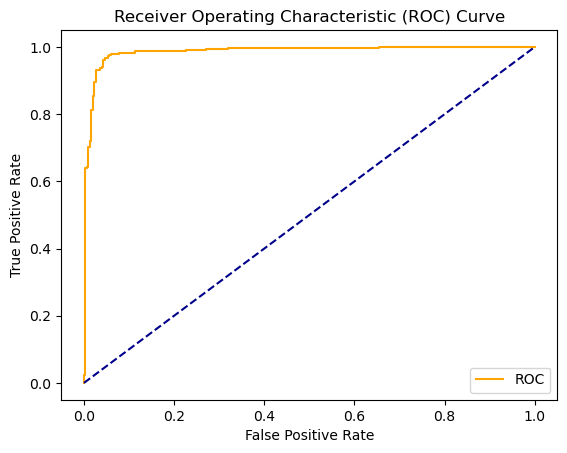

In [28]:
plot_roc_curve(fpr,tpr)